In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


**1-) Lendo os dados**

1.1) Tabela principal dos filmes

In [2]:
movies_df = pd.read_csv("../input/the-movies-dataset/movies_metadata.csv")
movies_df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
from datetime import datetime

def convert_float(b):
    try:
        return float(b)
    except:
        return None
def convert_datetime(d):
    try:
        return datetime.strptime(d,"%Y-%m-%d")
    except:
        return None
movies_df['revenue_float'] = movies_df['revenue'].astype(float)
movies_df['vote_average_float'] = movies_df['vote_average'].astype(float)
movies_df['vote_count_float'] = movies_df['vote_count'].astype(float)
movies_df['popularity_float'] = movies_df['popularity'].apply(lambda p: convert_float(p))
movies_df['runtime_float'] = movies_df['runtime'].astype(float)
movies_df['budget_float'] = movies_df['budget'].apply(lambda b: convert_float(b))
movies_df['release_date_datetime'] = movies_df['release_date'].apply(lambda d: convert_datetime(d))
movies_df['adult_bool'] = movies_df['adult'].astype(bool)
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_average,vote_count,revenue_float,vote_average_float,vote_count_float,popularity_float,runtime_float,budget_float,release_date_datetime,adult_bool
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,7.7,5415.0,373554033.0,7.7,5415.0,21.946943,81.0,30000000.0,1995-10-30,True
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,6.9,2413.0,262797249.0,6.9,2413.0,17.015539,104.0,65000000.0,1995-12-15,True
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,6.5,92.0,0.0,6.5,92.0,11.712900,101.0,0.0,1995-12-22,True
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,6.1,34.0,81452156.0,6.1,34.0,3.859495,127.0,16000000.0,1995-12-22,True
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,5.7,173.0,76578911.0,5.7,173.0,8.387519,106.0,0.0,1995-02-10,True


In [5]:
movies_df.popularity_float

0        21.946943
1        17.015539
2        11.712900
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity_float, Length: 45466, dtype: float64

**2-) Construção de novas tabelas**


2.1) Genero dos filmes

In [6]:
import json 

def parse_str_json(string):
    try:
        string = string.replace("'",'"')
        lista = json.loads(string)
        return lista
    except:
        return []
    

In [7]:
genres_df = pd.DataFrame({'id':[],'name':[],'id_filme':[],})

for i in range(len(movies_df)):
    lista = parse_str_json(movies_df.genres.iloc[i])
    for j in range(len(lista)):
        lista[j]['id_filme'] = movies_df.id.iloc[i]
    genres_df = genres_df.append(lista,ignore_index=True,sort=False)
genres_df.head()


,id,name,id_filme
0,16.0,Animation,862
1,35.0,Comedy,862
2,10751.0,Family,862
3,12.0,Adventure,8844
4,14.0,Fantasy,8844


In [8]:
genres_df.to_csv("genres.csv")

2.1) Companhias que fazem os filmes

In [9]:
movies_df.production_companies.iloc[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [10]:
companies_df = pd.DataFrame({'id':[],'name':[],'id_filme':[],})

for i in range(len(movies_df)):
    lista = parse_str_json(movies_df.production_companies.iloc[i])
    for j in range(len(lista)):
        lista[j]['id_filme'] = movies_df.id.iloc[i]
    companies_df = companies_df.append(lista,ignore_index=True,sort=False)
companies_df.head()

,id,name,id_filme
0,3.0,Pixar Animation Studios,862
1,559.0,TriStar Pictures,8844
2,2550.0,Teitler Film,8844
3,10201.0,Interscope Communications,8844
4,6194.0,Warner Bros.,15602


In [11]:
companies_df.to_csv("companies.csv")

2.1) Paises que fazem os filmes

In [12]:
paises_df = pd.DataFrame({'iso_3166_1':[],'name':[],'id_filme':[],})

for i in range(len(movies_df)):
    lista = parse_str_json(movies_df.production_countries.iloc[i])
    if(isinstance(lista,list)==False):
        lista=[]
    for j in range(len(lista)):
        lista[j]['id_filme'] = movies_df.id.iloc[i]
    paises_df = paises_df.append(lista,ignore_index=True,sort=False)
paises_df.head()

,iso_3166_1,name,id_filme
0,US,United States of America,862
1,US,United States of America,8844
2,US,United States of America,15602
3,US,United States of America,31357
4,US,United States of America,11862


In [13]:
paises_df.to_csv("paises.csv")

**3-) Analises**

3.1-) Linguagens originais

Quantidade total de linguagens originais: 92


<AxesSubplot:>

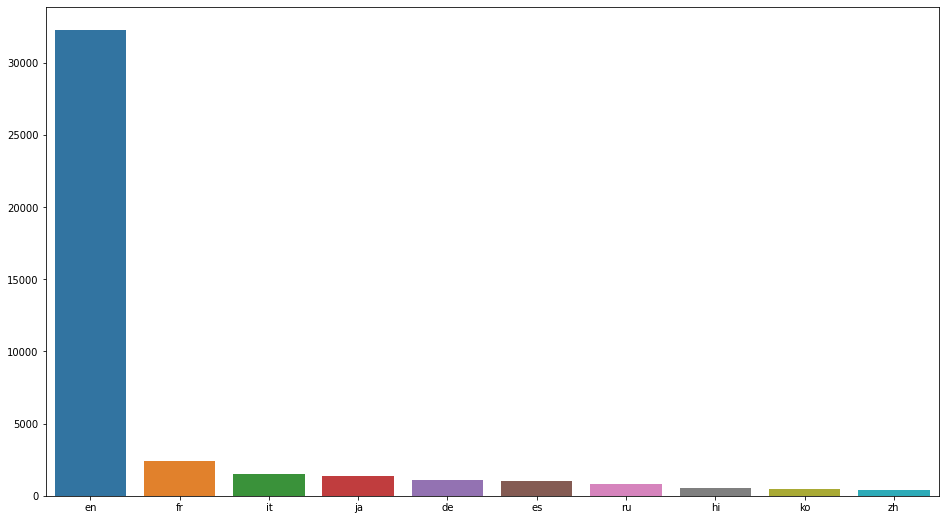

In [14]:
fig,ax = plt.subplots(figsize=(16,9))
languages = movies_df.original_language.value_counts()
print(f'Quantidade total de linguagens originais: {len(languages.keys())}')
sns.barplot(x = languages.keys()[:10], y = languages.values[:10])

* Como esperado, os filmes com linguagens originais em ingles dominam o dataset.

3.2-) Orçamento

In [15]:
budgets = movies_df.budget_float[(movies_df.budget_float>0)]
budgets

0        30000000.0
1        65000000.0
3        16000000.0
5        60000000.0
6        58000000.0
            ...    
45402     2000000.0
45408     2000000.0
45409      800000.0
45412     2000000.0
45422     5000000.0
Name: budget_float, Length: 8890, dtype: float64

<AxesSubplot:>

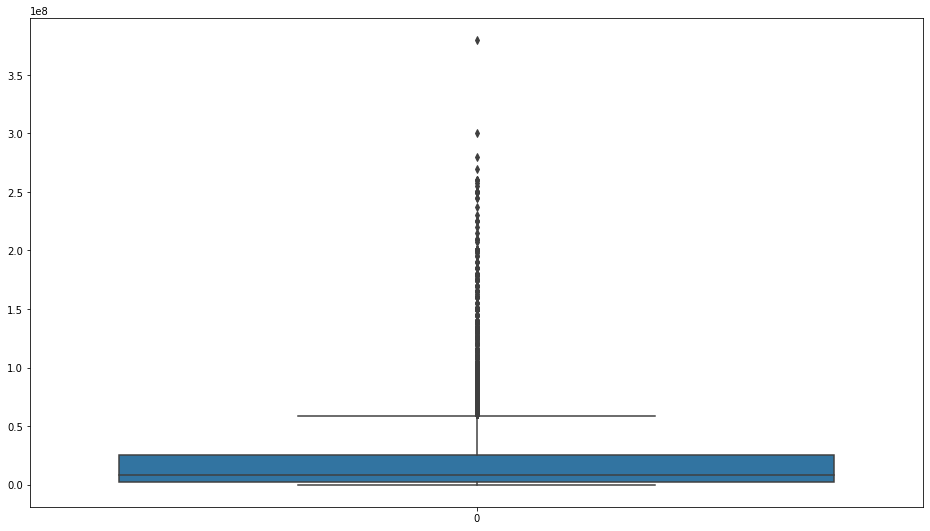

In [16]:
fig,ax = plt.subplots(figsize=(16,9))
sns.boxplot(data=budgets)

Quantidade de filmes com orçamento abaixo de 100 dolares: 2772.0


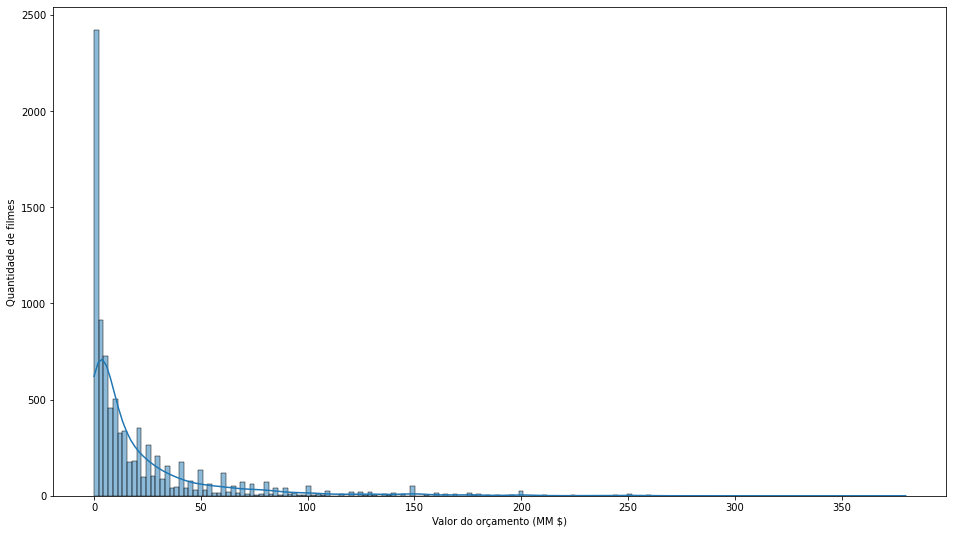

In [17]:
fig,ax = plt.subplots(figsize=(16,9))
sns.histplot(data=budgets/(10**6),kde=True)
ax.set_xlabel("Valor do orçamento (MM $)")
ax.set_ylabel("Quantidade de filmes")
print(f'Quantidade de filmes com orçamento abaixo de 100 dolares: {budgets[budgets<100].sum()}')

* Grande quantidade de filmes sem orçamento, apenas 8890 apresentam, de um dataset contendo aproximadamente 45 mil
* Grande quantidade de outliers com valores altos, explicado pela maior parte dos filmes apresentarem orçamento baixo
    * Acredito que os outliers não possam ser retirados, mas sim analisados a grande quantidade de filmes com orçamento baixo

3.3-) Tempo do filme

In [18]:
NaN_runtime = movies_df.runtime_float.isnull()

runtime_movies = movies_df.runtime_float[((movies_df.runtime_float>0) & (NaN_runtime==False)) ]
runtime_movies.sort_values()

35146       1.0
36577       1.0
36576       1.0
44965       1.0
42357       1.0
          ...  
13953     925.0
13767     931.0
40938    1140.0
19965    1140.0
24178    1256.0
Name: runtime_float, Length: 43645, dtype: float64

<AxesSubplot:>

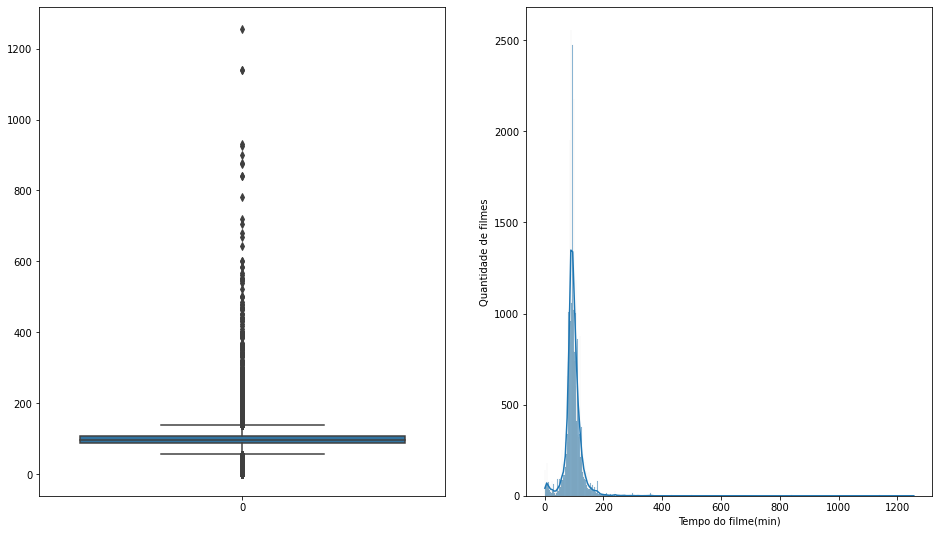

In [19]:
fig,ax = plt.subplots(1,2,figsize=(16,9))
sns.histplot(ax=ax[1],data=runtime_movies,kde=True)
ax[1].set_xlabel("Tempo do filme(min)")
ax[1].set_ylabel("Quantidade de filmes")

sns.boxplot(ax=ax[0],data=runtime_movies)


* Caso contrario ao do orçamento
    * Possivel retirada dos outliers altos
    * Analise para retirada dos outliers baixos
* Distribuição proxima a curva normal


3.4-) Avaliações

In [20]:
NaN_ava = movies_df.vote_average_float.isnull()

avaliations_movies = movies_df.vote_average_float[((movies_df.vote_average_float>0) & (NaN_ava==False)) ]


count_ava_movies = movies_df.vote_count_float[((movies_df.vote_count_float>0) & (movies_df.vote_count_float.isnull()==False)) ]
count_ava_movies

0        5415.0
1        2413.0
2          92.0
3          34.0
4         173.0
          ...  
45459       1.0
45460      26.0
45461       1.0
45462       3.0
45463       6.0
Name: vote_count_float, Length: 42561, dtype: float64

Text(0, 0.5, 'Quantidade de filmes')

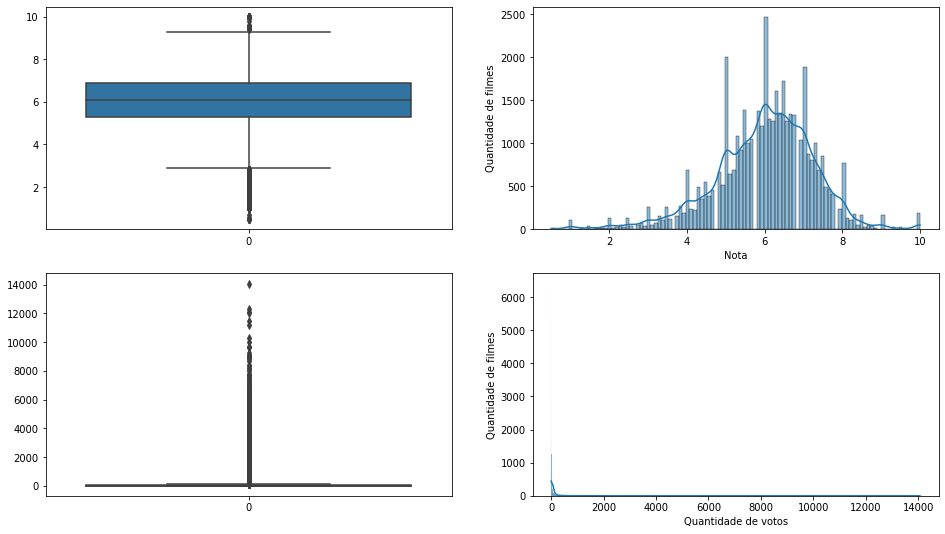

In [21]:
fig,ax = plt.subplots(2,2,figsize=(16,9))

sns.boxplot(ax=ax[0,0],data=avaliations_movies)
sns.histplot(ax=ax[0,1],data=avaliations_movies,kde=True)
ax[0,1].set_xlabel("Nota")
ax[0,1].set_ylabel("Quantidade de filmes")

sns.boxplot(ax=ax[1,0],data=count_ava_movies)
sns.histplot(ax=ax[1,1],data=count_ava_movies,kde=True)
ax[1,1].set_xlabel("Quantidade de votos")
ax[1,1].set_ylabel("Quantidade de filmes")

1. Media de votos
* Dados bem consistentes
* Obedecem distribuição normal
* Outliers podem ser retirados, mas mecere uma analise antes

2. Quantidade de votos
* Inconstancia na distribuição e outliers - Sugestão: Adicionar essa info na media da nota, como 'força' estatistica da media

3.5-) Bilheteria

In [22]:
NaN_bilhe = movies_df.revenue_float.isnull()

bilheteria_movies = movies_df.revenue_float[((movies_df.revenue_float>0) & (NaN_bilhe==False)) ]
bilheteria_movies

0        373554033.0
1        262797249.0
3         81452156.0
4         76578911.0
5        187436818.0
            ...     
45399            3.0
45401        50656.0
45409      1328612.0
45412      1268793.0
45422      1413000.0
Name: revenue_float, Length: 7408, dtype: float64

Text(0, 0.5, 'Quantidade de filmes')

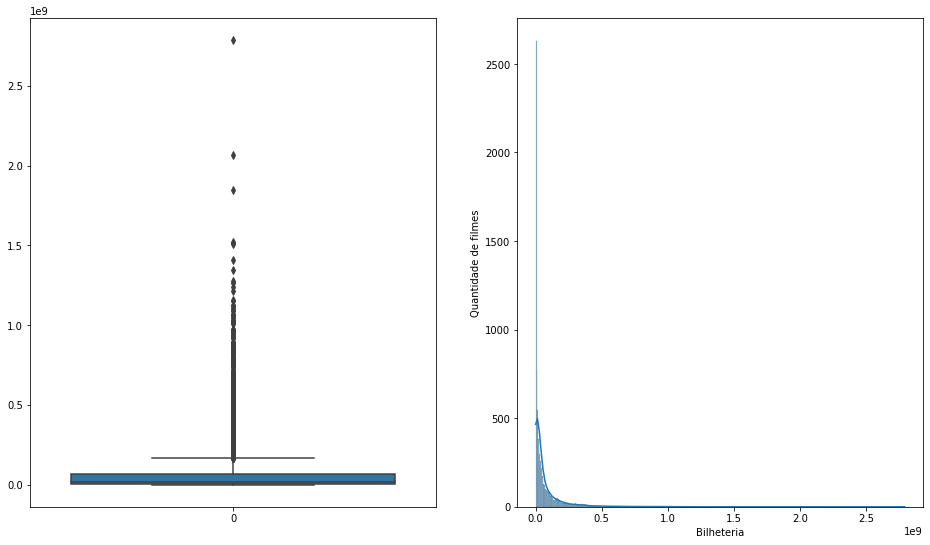

In [23]:
fig,ax = plt.subplots(1,2,figsize=(16,9))

sns.boxplot(ax=ax[0],data=bilheteria_movies)
sns.histplot(ax=ax[1],data=bilheteria_movies,kde=True)
ax[1].set_xlabel("Bilheteria")
ax[1].set_ylabel("Quantidade de filmes")

* Analise semelhante ao budget

3.6-) Correlação linear entre as variaveis 

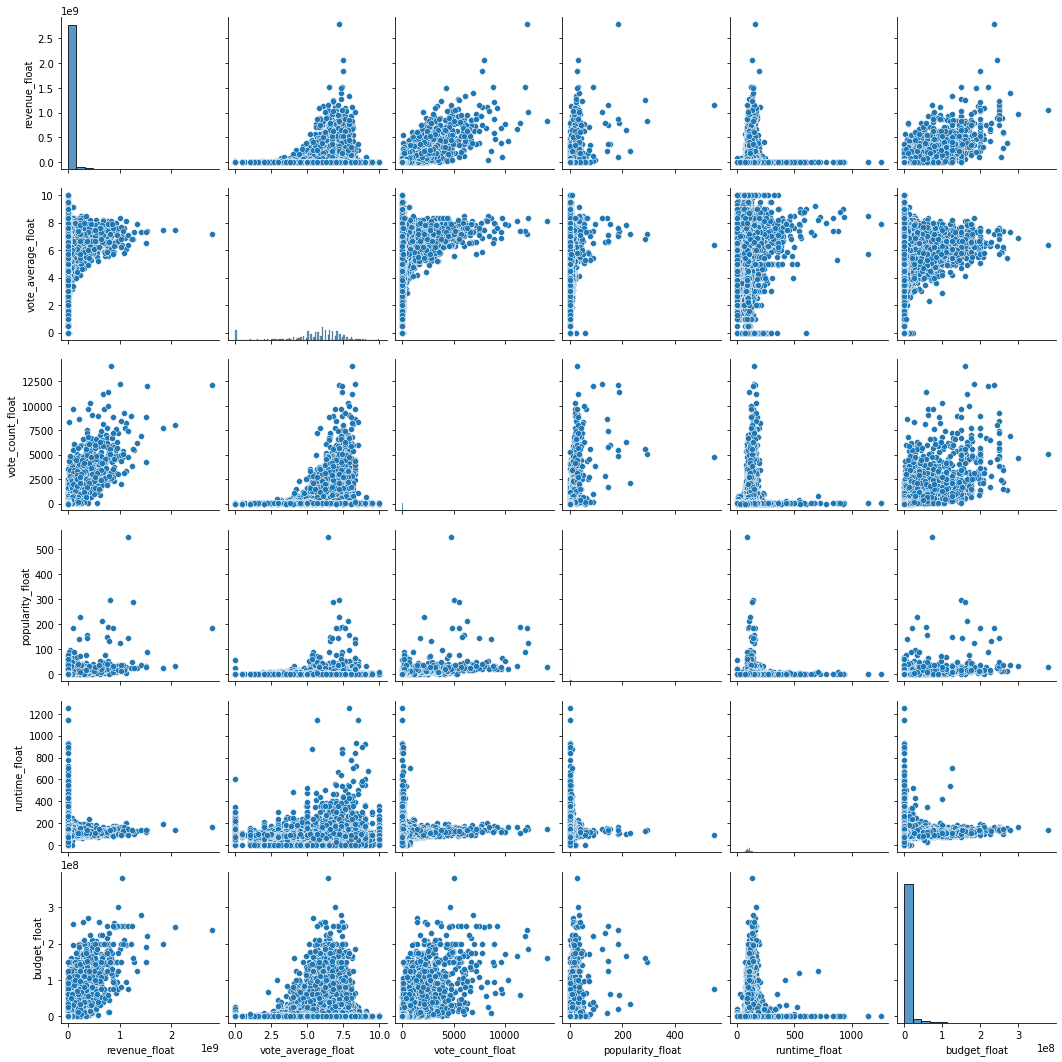

In [24]:
columns = ['revenue_float','vote_average_float','vote_count_float','popularity_float','runtime_float','budget_float']
sns.pairplot(data = movies_df[columns])

* As 6 variaveis analisadas não apresentam correlação linear entre elas

3.7-) Generos

In [25]:
genres_df = pd.read_csv('./genres.csv').iloc[:,1:]
genres_df['id_filme'] = genres_df['id_filme'].astype(object)
genres_df.head() 

,id,name,id_filme
0,16.0,Animation,862
1,35.0,Comedy,862
2,10751.0,Family,862
3,12.0,Adventure,8844
4,14.0,Fantasy,8844


In [26]:
genres_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91106 entries, 0 to 91105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        91106 non-null  float64
 1   name      91106 non-null  object 
 2   id_filme  91106 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.1+ MB


In [27]:
genres_movies_df = genres_df.merge(right=movies_df,how='left',left_on='id_filme',right_on='id')
genres_movies_df.head()

,id_x,name,id_filme,adult,belongs_to_collection,budget,genres,homepage,id_y,imdb_id,...,vote_average,vote_count,revenue_float,vote_average_float,vote_count_float,popularity_float,runtime_float,budget_float,release_date_datetime,adult_bool
0,16.0,Animation,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,...,7.7,5415.0,373554033.0,7.7,5415.0,21.946943,81.0,30000000.0,1995-10-30,True
1,35.0,Comedy,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,...,7.7,5415.0,373554033.0,7.7,5415.0,21.946943,81.0,30000000.0,1995-10-30,True
2,10751.0,Family,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,...,7.7,5415.0,373554033.0,7.7,5415.0,21.946943,81.0,30000000.0,1995-10-30,True
3,12.0,Adventure,8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,...,6.9,2413.0,262797249.0,6.9,2413.0,17.015539,104.0,65000000.0,1995-12-15,True
4,14.0,Fantasy,8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,...,6.9,2413.0,262797249.0,6.9,2413.0,17.015539,104.0,65000000.0,1995-12-15,True


In [28]:
avaliacao_genero = genres_movies_df.groupby('name').vote_average_float.mean().sort_values(ascending=False)
bilheteria_genero = genres_movies_df.groupby('name').revenue_float.mean().sort_values(ascending=False)
bilheteria_genero

name
Adventure                                5.712677e+07
Fantasy                                  4.490633e+07
Family                                   3.872682e+07
Animation                                3.487328e+07
Science Fiction                          3.207386e+07
Action                                   3.053518e+07
Thriller                                 1.702230e+07
Crime                                    1.471963e+07
Mystery                                  1.404227e+07
Comedy                                   1.265469e+07
War                                      1.200789e+07
Romance                                  1.090774e+07
History                                  1.065966e+07
Music                                    8.356433e+06
Drama                                    7.925001e+06
Horror                                   6.594759e+06
Western                                  4.916026e+06
Documentary                              3.682745e+05
Foreign                

Text(0, 0.5, 'Bilheteria Média')

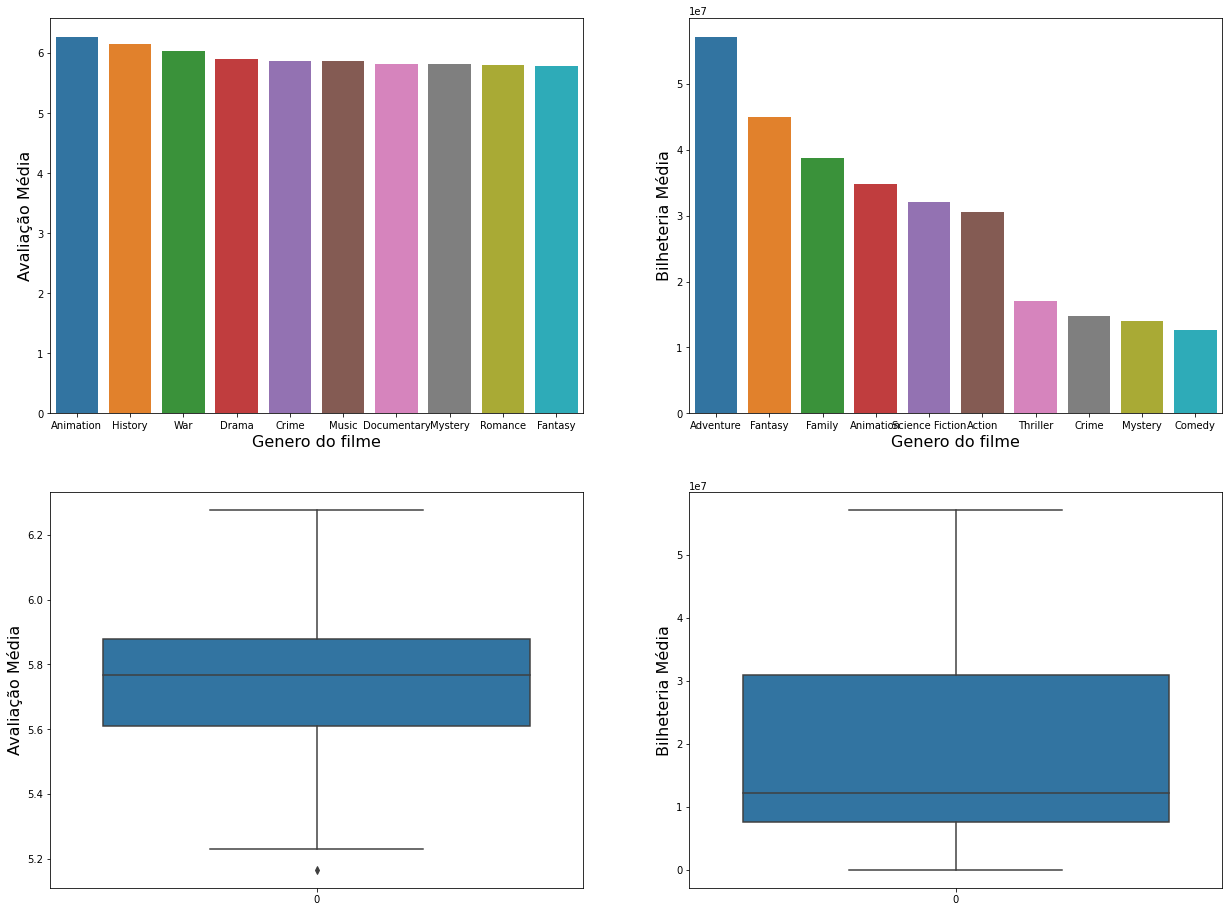

In [29]:
fig,ax = plt.subplots(2,2,figsize=(21,16))

sns.barplot(ax=ax[0,0],x = avaliacao_genero.keys()[:10], y = avaliacao_genero.values[:10])
sns.boxplot(ax=ax[1,0],data = avaliacao_genero)

ax[0,0].set_ylabel('Avaliação Média',fontsize=16)
ax[0,0].set_xlabel('Genero do filme',fontsize=16)
ax[1,0].set_ylabel('Avaliação Média',fontsize=16)

sns.barplot(ax=ax[0,1],x = bilheteria_genero.keys()[:10], y = bilheteria_genero.values[:10])
sns.boxplot(ax=ax[1,1],data =bilheteria_genero)

ax[0,1].set_ylabel('Bilheteria Média',fontsize=16)
ax[0,1].set_xlabel('Genero do filme',fontsize=16)
ax[1,1].set_ylabel('Bilheteria Média',fontsize=16)





* Alta mudança na bilheteria dos filmes após o genero de Ação
* Boxplot da bilheteria mostra que os demais generos apresentam valores ainda menores
* Pequena variação na avaliação na avaliação dos filmes extratificada por genero, verificada pelo boxplot
    * As 10 maiores avaliações medias não são tão maiores que as demais

3.8-) Produtoras dos filmes

In [30]:
companies_df = pd.read_csv('./companies.csv').iloc[:,1:]
companies_df['id_filme'] = companies_df['id_filme'].astype(str)
companies_df.head() 

,id,name,id_filme
0,3.0,Pixar Animation Studios,862
1,559.0,TriStar Pictures,8844
2,2550.0,Teitler Film,8844
3,10201.0,Interscope Communications,8844
4,6194.0,Warner Bros.,15602


In [31]:
companies_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68509 entries, 0 to 68508
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        68509 non-null  float64
 1   name      68509 non-null  object 
 2   id_filme  68509 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [32]:
companies_movies_df = companies_df.merge(right=movies_df,how='left',left_on='id_filme',right_on='id')
companies_movies_df.sample(10)

,id_x,name,id_filme,adult,belongs_to_collection,budget,genres,homepage,id_y,imdb_id,...,vote_average,vote_count,revenue_float,vote_average_float,vote_count_float,popularity_float,runtime_float,budget_float,release_date_datetime,adult_bool
39659,62977.0,Wise Guy Productions,15826,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 18, 'nam...",NaN,15826,tt0400201,...,4.8,5.0,0.0,4.8,5.0,0.767032,94.0,0.0,2005-05-27,True
68380,2171.0,Les Productions FDL,7014,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,7014,tt0069369,...,7.1,9.0,0.0,7.1,9.0,2.018911,104.0,0.0,1973-03-01,True
40717,3477.0,Star Overseas,53168,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,53168,tt0188766,...,6.9,34.0,0.0,6.9,34.0,3.139003,89.0,0.0,1999-02-13,True
56432,51436.0,Hahnscape,207936,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 10749,...",NaN,207936,tt2338424,...,6.6,51.0,135026.0,6.6,51.0,10.932742,105.0,0.0,2015-04-18,True
49101,20491.0,Paradise Group,62678,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,62678,tt0460012,...,6.1,17.0,0.0,6.1,17.0,1.055545,97.0,0.0,2006-02-02,True
2953,14.0,Miramax Films,38295,False,NaN,18000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,38295,tt0120112,...,5.3,26.0,0.0,5.3,26.0,2.314911,100.0,18000000.0,1997-08-29,True
43557,15893.0,Tax Shelter Film Funding,190870,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,190870,tt2403981,...,4.4,9.0,0.0,4.4,9.0,4.112052,106.0,0.0,2013-09-11,True
3389,559.0,TriStar Pictures,9448,False,NaN,13000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9448,tt0120609,...,6.1,112.0,27007143.0,6.1,112.0,5.975082,91.0,13000000.0,1998-04-24,True
46826,6861.0,Lolafilms,48635,False,"{'id': 277798, 'name': 'Isi/Disi Collection', ...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,48635,tt0390136,...,5.5,13.0,0.0,5.5,13.0,1.437794,88.0,0.0,2004-07-23,True
10156,7053.0,Catch 23 Entertainment,9357,False,NaN,12000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,9357,tt0265459,...,6.6,444.0,52223306.0,6.6,444.0,10.753445,96.0,12000000.0,2002-08-21,True


In [33]:
avaliacao_companies = companies_movies_df.groupby('name').vote_average_float.mean().sort_values(ascending=False)
bilheteria_copanies = companies_movies_df.groupby('name').revenue_float.mean().sort_values(ascending=False)
bilheteria_copanies.keys()

Index(['Colorado Office of Film, Television & Media',
       'Abu Dhabi Film Commission', 'Vita-Ray Dutch Productions (III)',
       'Deluxe Digital Studios', 'Ian Bryce Productions',
       'Black Hangar Studios', 'Truenorth Productions',
       'Second Mate Productions', '3Foot7', 'Patalex IV Productions Limited',
       ...
       'Gus', 'Gurian Entertainment', 'Gun for Hire Films', 'Gunslinger',
       'Gunro', 'Gunpowder Co.', 'Gunman Productions', 'Gunless Productions',
       'Gundersen Entertainment', '프로덕션M'],
      dtype='object', name='name', length=22979)

Text(0, 0.5, 'Bilheteria Média')

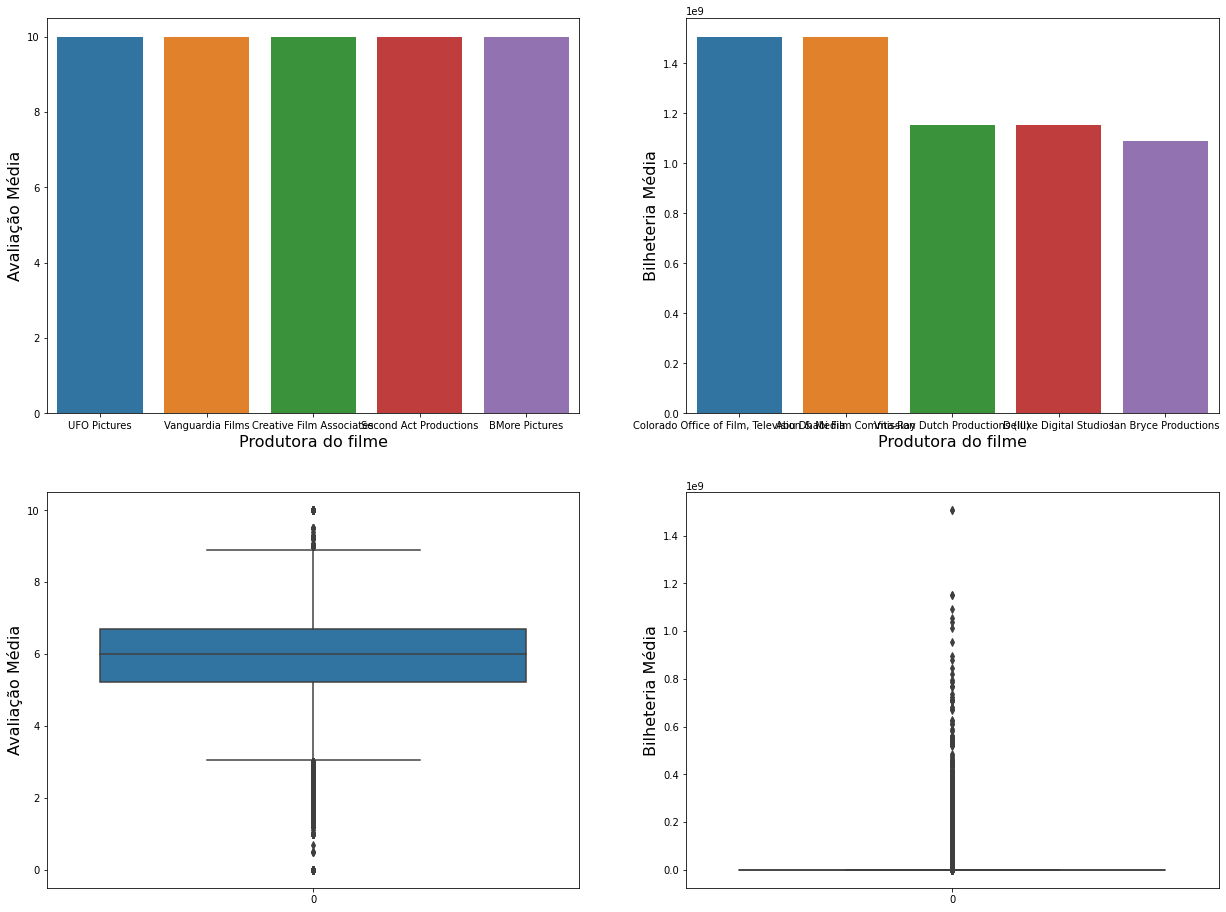

In [34]:
fig,ax = plt.subplots(2,2,figsize=(21,16))

sns.barplot(ax=ax[0,0],x = avaliacao_companies.keys()[:5], y = avaliacao_companies.values[:5])
sns.boxplot(ax=ax[1,0],data = avaliacao_companies)

ax[0,0].set_ylabel('Avaliação Média',fontsize=16)
ax[0,0].set_xlabel('Produtora do filme',fontsize=16)
ax[1,0].set_ylabel('Avaliação Média',fontsize=16)

sns.barplot(ax=ax[0,1],x = bilheteria_copanies.keys()[:5], y = bilheteria_copanies.values[:5])
sns.boxplot(ax=ax[1,1],data =bilheteria_copanies)

ax[0,1].set_ylabel('Bilheteria Média',fontsize=16)
ax[0,1].set_xlabel('Produtora do filme',fontsize=16)
ax[1,1].set_ylabel('Bilheteria Média',fontsize=16)



3.9-) Paises que produzem os filmes

In [35]:
paises_moveis = movies_df.merge(right=paises_df,how='left',left_on='id',right_on='id_filme')
paises_moveis.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_average_float,vote_count_float,popularity_float,runtime_float,budget_float,release_date_datetime,adult_bool,iso_3166_1,name,id_filme
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,7.7,5415.0,21.946943,81.0,30000000.0,1995-10-30,True,US,United States of America,862
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,6.9,2413.0,17.015539,104.0,65000000.0,1995-12-15,True,US,United States of America,8844
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,6.5,92.0,11.712900,101.0,0.0,1995-12-22,True,US,United States of America,15602
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,6.1,34.0,3.859495,127.0,16000000.0,1995-12-22,True,US,United States of America,31357
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,5.7,173.0,8.387519,106.0,0.0,1995-02-10,True,US,United States of America,11862


<AxesSubplot:xlabel='iso_3166_1'>

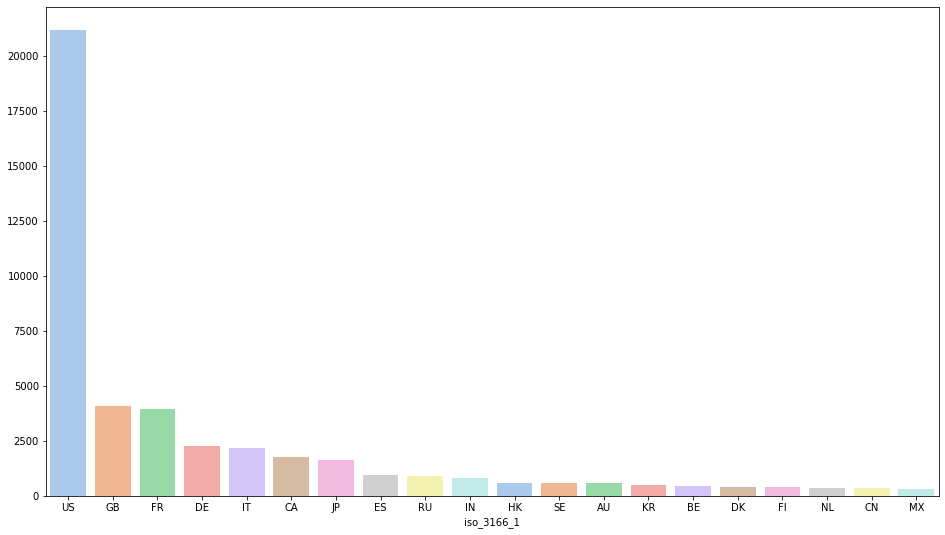

In [36]:
qtd_paises = paises_moveis.groupby('iso_3166_1').iso_3166_1.count().sort_values(ascending=False)[:20]



fig,ax = plt.subplots(figsize=(16,9))

sns.barplot(x = qtd_paises.keys(), y = qtd_paises.values,palette='pastel')
